# Part 2 - Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is a data analysis method that helps data scientists understand their data and identify patterns. It's often used as the first step in data analysis.

## Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('/content/created_raw_data.csv')
print(df.shape)
print(df.info())
df.head()

(1010, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 808 non-null    object 
 1   given_name             707 non-null    object 
 2   surname                505 non-null    object 
 3   date_of_birth          807 non-null    object 
 4   phone_number           909 non-null    object 
 5   email                  958 non-null    object 
 6   address                633 non-null    object 
 7   city                   859 non-null    object 
 8   state                  865 non-null    object 
 9   zipcode                640 non-null    float64
 10  semi_constant_2        1010 non-null   object 
 11  multicollinearity 3    706 non-null    float64
 12  constant_1             1010 non-null   object 
 13  random choice 2        709 non-null    object 
 14  informative_2          1010 non-null   float6

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,uniform corr 2,multicollinearity 2,outliers 1,multicollinearity 4,random label num 3,standard scaling,corr_feature_class,informative_1,constant_2,class
0,NaN,Shawn,NaN,1933-08-31,(968)487-2956x27427,walkeramanda@example.com,045 Fowler Spring Apt. 450,West Bruce,MA,32951.0,...,0.336978,-1.030274,0.768145,0.371535,label num lo 3,53962.853545,3.184217,-0.999102,constant_value,1
1,binary_2,John,Bryant,2004-12-19,731.899.4368x677,NaN,76988 Tony Plains Suite 161,Shannonhaven,ME,NaN,...,0.832943,NaN,0.274048,0.195892,label num lo 3,42805.421121,NaN,1.246686,constant_value,1
2,binary_1,NaN,NaN,1944-02-04,001-877-232-0290x332,NaN,NaN,Kaylafort,WA,3222.0,...,0.685752,0.844525,0.188039,-0.239963,label num lo 2,42575.623356,NaN,0.962777,constant_value,1
3,binary_2,NaN,NaN,NaN,768-419-9512x282,hcollins@example.net,585 Rivas River,East Rachel,DC,NaN,...,0.777135,0.174121,1.784847,-0.770139,label num lo 1,46758.872175,4.950943,-2.957441,constant_value,1
4,binary_1,Shannon,Williamson,1993-01-06,NaN,davidanderson@example.org,322 Roberts Mountains Suite 220,Katiebury,KS,83537.0,...,0.992948,NaN,0.846802,0.968097,label num lo 1,64374.589787,2.071837,1.141165,constant_value,1


## Var Types

In [ ]:
df_numerical = df.select_dtypes(include='number').columns
df_object = df.select_dtypes(include=['object']).columns
df_discreet = df.select_dtypes(include=['category']).columns
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns
df_discreet

Index([], dtype='object')

In [ ]:
import numpy as np
import pickle

df_numerical = df.select_dtypes(exclude=['category', 'object']).columns.to_list()
df_object = df.select_dtypes(include=['object']).columns.to_list()
df_discreet = df.select_dtypes(include=['category']).columns.to_list()
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns.to_list()

# Create a variable to pickle
data = {'df_numerical': df_numerical, 'df_object': df_object, 'df_discreet': df_discreet, 'df_categorical_features': df_categorical_features}

# Pickle the variable and save it to a file
with open('var_types.pkl', 'wb') as f:
    pickle.dump(data, f)


## Correlation

In [ ]:
# code along
df._get_numeric_data().corr().round(2)

,zipcode,multicollinearity 3,informative_2,correlated w target 2,uniform corr 1,target,min max scaling,correlated w target 1,outliers 2,multicollinearity 1,duplicate_2,duplicate_1,uniform corr 2,multicollinearity 2,outliers 1,multicollinearity 4,standard scaling,corr_feature_class,informative_1,class
zipcode,1.00,0.02,0.08,0.03,0.09,0.07,-0.00,0.06,-0.01,-0.02,0.08,0.07,0.11,-0.01,0.03,0.00,0.01,0.09,0.07,0.05
multicollinearity 3,0.02,1.00,0.02,0.04,-0.06,0.02,-0.03,0.03,0.01,0.07,0.02,0.00,0.09,0.07,-0.00,0.89,-0.00,0.05,0.00,0.04
informative_2,0.08,0.02,1.00,0.70,0.71,0.99,-0.06,0.52,-0.05,-0.01,1.00,0.10,0.72,-0.01,0.01,-0.02,-0.06,0.33,0.10,0.72
correlated w target 2,0.03,0.04,0.70,1.00,0.48,0.69,-0.06,0.44,-0.01,-0.01,0.70,0.05,0.50,0.02,0.02,-0.02,-0.05,0.21,0.05,0.50
uniform corr 1,0.09,-0.06,0.71,0.48,1.00,0.72,-0.04,0.45,-0.00,0.01,0.71,-0.00,0.52,-0.06,0.01,-0.02,-0.01,0.25,-0.00,0.55
target,0.07,0.02,0.99,0.69,0.72,1.00,-0.06,0.53,-0.05,-0.01,0.99,-0.03,0.72,-0.02,0.02,-0.01,-0.06,0.33,-0.03,0.72
min max scaling,-0.00,-0.03,-0.06,-0.06,-0.04,-0.06,1.00,-0.03,0.02,0.01,-0.06,0.03,-0.02,-0.02,-0.03,-0.03,-0.01,-0.03,0.03,-0.04
correlated w target 1,0.06,0.03,0.52,0.44,0.45,0.53,-0.03,1.00,-0.03,-0.03,0.52,-0.08,0.37,-0.01,-0.02,-0.02,-0.06,0.20,-0.08,0.41
outliers 2,-0.01,0.01,-0.05,-0.01,-0.00,-0.05,0.02,-0.03,1.00,0.04,-0.05,-0.01,-0.07,0.06,0.01,0.04,-0.02,-0.02,-0.01,-0.04
multicollinearity 1,-0.02,0.07,-0.01,-0.01,0.01,-0.01,0.01,-0.03,0.04,1.00,-0.01,0.05,0.00,0.71,-0.01,0.08,0.01,-0.02,0.05,-0.02


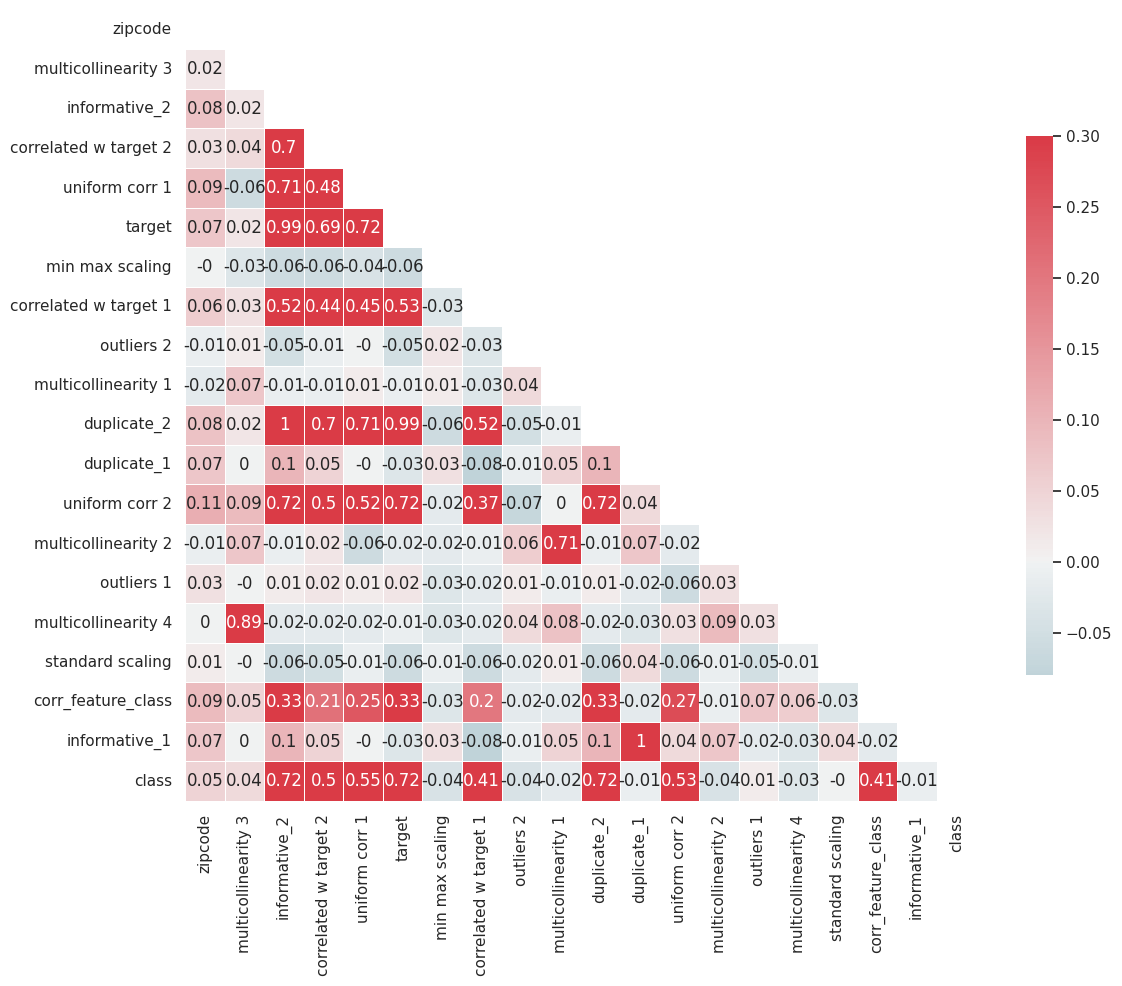

In [ ]:
# show correlation between the features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = df._get_numeric_data().corr().round(2)

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(12, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [ ]:
import pickle

# calculate the correlation matrix
corr_matrix = df._get_numeric_data().corr()

# Create a mask for the upper triangle (to avoid duplicates)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Convert the correlation matrix to a long format
corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ['feature1', 'feature2', 'correlation']

# Filter for correlations above a certain threshold (e.g., 0.7)
high_corr_df = corr_df[(abs(corr_df['correlation']) > 0.7) & (corr_df['feature1'] != corr_df['feature2'])]

# Sort by absolute correlation in descending order
high_corr_df = high_corr_df.sort_values(by='correlation', ascending=False, key=abs)

# Print the top correlated features
# print(high_corr_df['feature1'].to_list()[4:10])
print(high_corr_df)

# Create a variable to pickle
data = {'correlation scores': high_corr_df}

# Pickle the variable and save it to a file
with open('correlation_scores.pkl', 'wb') as f:
    pickle.dump(data, f)

                feature1             feature2  correlation
202          duplicate_2        informative_2     1.000000
50         informative_2          duplicate_2     1.000000
371        informative_1          duplicate_1     1.000000
238          duplicate_1        informative_1     1.000000
102               target        informative_2     0.991500
45         informative_2               target     0.991500
205          duplicate_2               target     0.991500
110               target          duplicate_2     0.991500
301  multicollinearity 4  multicollinearity 3     0.892170
35   multicollinearity 3  multicollinearity 4     0.892170
385                class               target     0.722662
119               target                class     0.722662
242       uniform corr 2        informative_2     0.719346
52         informative_2       uniform corr 2     0.719346
250       uniform corr 2          duplicate_2     0.719346
212          duplicate_2       uniform corr 2     0.7193

In [ ]:
# check for vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# handle null values (using mean imputation for simplicity)
x_copy = df.drop('class', axis=1)._get_numeric_data()
x_copy.fillna(x_copy.mean(), inplace=True)

print(max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]))

# calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


inf
                 Variable           VIF
0                 zipcode  1.015063e+00
1     multicollinearity 3  2.138212e+00
2           informative_2           inf
3   correlated w target 2  1.632060e+00
4          uniform corr 1  1.593898e+00
5                  target  1.207466e+04
6         min max scaling  1.006369e+00
7   correlated w target 1  1.284399e+00
8              outliers 2  1.011648e+00
9     multicollinearity 1  1.333993e+00
10            duplicate_2           inf
11            duplicate_1           inf
12         uniform corr 2  1.886804e+00
13    multicollinearity 2  1.333909e+00
14             outliers 1  1.018405e+00
15    multicollinearity 4  2.137935e+00
16       standard scaling  1.011458e+00
17     corr_feature_class  1.098084e+00
18          informative_1           inf


## Multicollinearity

* We want high correlation with target
* We don't want high correlation between features
* Drop correlated features
* Combine correlated features

In [ ]:
# iterate dropping features with high vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed1=[]
x_copy1 = x_copy.copy()
max_vif = thresh = 10
while max_vif >= thresh:
  my_list = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
  max_vif = max(my_list)
  if max_vif > thresh:
    max_index = my_list.index(max_vif)
    removed1.append(x_copy1.columns[max_index])
    print(x_copy1.columns[max_index], variance_inflation_factor(x_copy1, max_index))
    x_copy1.drop(x_copy1.columns[max_index], axis=1, inplace=True)


# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy1.columns
vif["VIF"] = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
print(vif)

# Create a variable to pickle
data = {'vif': vif}

# Pickle the variable and save it to a file
with open('vif.pkl', 'wb') as f:
    pickle.dump(data, f)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


informative_2 inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


duplicate_1 inf
target 12074.657735332685
standard scaling 16.509736989144567
min max scaling 10.533162983803953
                 Variable       VIF
0                 zipcode  4.709757
1     multicollinearity 3  2.146030
2   correlated w target 2  1.641712
3          uniform corr 1  5.929228
4   correlated w target 1  1.289687
5              outliers 2  2.506762
6     multicollinearity 1  1.332343
7             duplicate_2  2.318223
8          uniform corr 2  5.757291
9     multicollinearity 2  1.333232
10             outliers 1  1.015404
11    multicollinearity 4  2.146127
12     corr_feature_class  1.772506
13          informative_1  1.042471


In [ ]:
# check again vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed2=[]
max_vif = thresh = 10
while max_vif >= thresh:
  max_vif = max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])])
  for i in range(x_copy.shape[1]):
    if variance_inflation_factor(x_copy, i) > thresh:
      removed2.append(x_copy.columns[i])
      print(x_copy.columns[i], variance_inflation_factor(x_copy, i))
      x_copy.drop(x_copy.columns[i], axis=1, inplace=True)
      break

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

informative_2 inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


target 12074.657735332685


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


min max scaling 14.361745578967106


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


duplicate_1 inf
standard scaling 12.10853858747324
                 Variable       VIF
0                 zipcode  4.709757
1     multicollinearity 3  2.146030
2   correlated w target 2  1.641712
3          uniform corr 1  5.929228
4   correlated w target 1  1.289687
5              outliers 2  2.506762
6     multicollinearity 1  1.332343
7             duplicate_2  2.318223
8          uniform corr 2  5.757291
9     multicollinearity 2  1.333232
10             outliers 1  1.015404
11    multicollinearity 4  2.146127
12     corr_feature_class  1.772506
13          informative_1  1.042471


In [ ]:
print(removed1)
print(removed2)

['informative_2', 'duplicate_1', 'target', 'standard scaling', 'min max scaling']
['informative_2', 'target', 'min max scaling', 'duplicate_1', 'standard scaling']


## Outliers

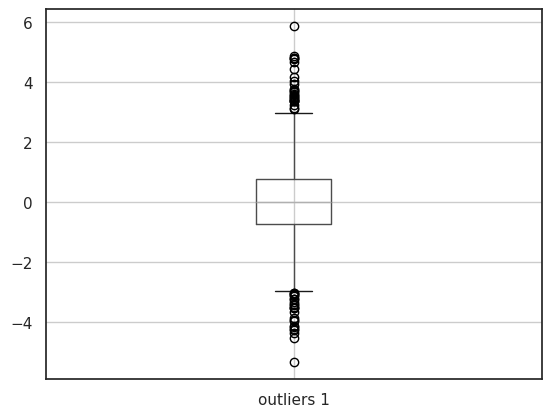

In [ ]:
# code along
df.boxplot(column=['outliers 1']);

In [ ]:
# code along
df.describe()

,zipcode,multicollinearity 3,informative_2,correlated w target 2,uniform corr 1,target,min max scaling,correlated w target 1,outliers 2,multicollinearity 1,duplicate_2,duplicate_1,uniform corr 2,multicollinearity 2,outliers 1,multicollinearity 4,standard scaling,corr_feature_class,informative_1,class
count,640.000000,706.000000,1010.000000,809.000000,707.000000,1010.000000,708.000000,707.000000,1010.000000,960.000000,1010.000000,1010.000000,910.000000,505.000000,910.000000,1010.000000,959.000000,706.000000,1010.000000,1010.000000
mean,48910.367188,0.056643,-0.018978,0.233254,0.512668,0.195609,353.181318,0.204917,2.915737,0.008584,-0.018978,-0.047372,0.491121,0.027540,0.015394,0.074832,49742.185097,1.993455,-0.047372,0.502970
std,28281.011740,0.976155,1.403413,3.061201,0.290183,2.991347,96.725339,3.051595,2.224509,0.986489,1.403413,1.324010,0.288899,0.997418,1.407682,0.993215,9799.815458,2.975748,1.324010,0.500239
min,847.000000,-3.351099,-4.543441,-10.116132,0.002162,-8.943212,15.913192,-6.721991,-4.812921,-3.366206,-4.543441,-3.836929,0.003578,-3.090673,-5.326487,-3.217381,17902.776155,-13.169188,-3.836929,0.000000
25%,25488.500000,-0.569616,-1.050339,-1.882708,0.259459,-2.166961,291.462655,-1.869868,1.384776,-0.645294,-1.050339,-1.018399,0.246506,-0.638674,-0.730369,-0.577756,43539.569260,0.306746,-1.018399,0.000000
50%,48578.500000,0.051905,-0.194004,0.120940,0.507277,-0.011259,346.027763,0.004724,2.898442,-0.013753,-0.194004,-0.224366,0.462612,0.053279,0.016738,0.103157,50073.227675,2.056788,-0.224366,1.000000
75%,72974.750000,0.716370,0.991017,2.184106,0.775120,2.367192,419.878369,2.269681,4.409038,0.679950,0.991017,0.975364,0.740412,0.685065,0.756294,0.748461,56162.359713,3.619112,0.975364,1.000000
max,99910.000000,3.117388,4.020262,8.943147,0.999846,9.299296,677.000587,10.031478,11.755554,3.044751,4.020262,3.994644,0.999809,2.673820,5.861472,4.131947,77666.806351,13.804090,3.994644,1.000000


In [ ]:
# Calculate outliers for the 'outliers 1' column (example)
Q1 = df['outliers 1'].quantile(0.25)
Q3 = df['outliers 1'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['outliers 1'] < (Q1 - 1.5 * IQR)) | (df['outliers 1'] > (Q3 + 1.5 * IQR))]

# Create a variable to pickle
data = {'outliers': outliers}

# Pickle the variable and save it to a file
with open('outliers.pkl', 'wb') as f:
    pickle.dump(data, f)

In [ ]:
# code along
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 808 non-null    object 
 1   given_name             707 non-null    object 
 2   surname                505 non-null    object 
 3   date_of_birth          807 non-null    object 
 4   phone_number           909 non-null    object 
 5   email                  958 non-null    object 
 6   address                633 non-null    object 
 7   city                   859 non-null    object 
 8   state                  865 non-null    object 
 9   zipcode                640 non-null    float64
 10  semi_constant_2        1010 non-null   object 
 11  multicollinearity 3    706 non-null    float64
 12  constant_1             1010 non-null   object 
 13  random choice 2        709 non-null    object 
 14  informative_2          1010 non-null   float64
 15  corr